<a href="https://colab.research.google.com/github/linyu3294/cs6220-data-minning-hw/blob/main/cs6220_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---
## **LOAD DATA: MNIST, FASHION, SPAMBASE, 20NG**


https://en.wikipedia.org/wiki/MNIST_database

http://yann.lecun.com/exdb/mnist/

https://www.kaggle.com/zalando-research/fashionmnist


**Load MNIST**

In [3]:
from keras.datasets import mnist 
import numpy as np
from sklearn.preprocessing import normalize

# load mnist data
(mnist_train, mnist_train_labels), (mnist_test, mnist_test_labels) = mnist.load_data()

# reshape and normalize
mnist_train = np.reshape(mnist_train, (60000, 784)) 
mnist_train = normalize(mnist_train, norm ='max')
mnist_test = np.reshape(mnist_test, (10000, 784))
mnist_test = normalize(mnist_test, norm ='max') 

11493376/11490434 [==============================] - 0s 0us/step


**Load FASHION**

In [2]:
from keras.datasets import fashion_mnist 
import numpy as np
from sklearn.preprocessing import normalize

# load mnist data
(fashion_train, fashion_train_labels), (fasion_test, fashion_test_labels) = fashion_mnist.load_data()

# reshape and normalize
fashion_train = np.reshape(fashion_train, (60000, 784)) 
fashion_train = normalize(fashion_train, norm ='max')
fasion_test = np.reshape(fasion_test, (10000, 784))
fasion_test = normalize(fasion_test, norm ='max') 

4423680/4422102 [==============================] - 0s 0us/step


**Load 20NG**

In [4]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.sparse import csr_matrix

# same normalization parameters just transform 
train_set = fetch_20newsgroups(subset='train')
ng_train = train_set.data
ng_train_labels = train_set.target
test_set = fetch_20newsgroups(subset='test')
ng_test = test_set.data
ng_test_labels = test_set.target


# normalize data
vectorizer = TfidfVectorizer()
ng_train = csr_matrix(vectorizer.fit_transform(ng_train)).todense()
ng_test = csr_matrix(vectorizer.transform(ng_test)).todense()

**Load SPAMBASE**

In [5]:
import numpy as np

def parse_data (infile, num_features) -> np.array :
  max_news_index = 0;

  infile = open(infile, "r")
  all_data = infile.read()
  lines = all_data.splitlines()

  X = []
  X_target = []
  for line in lines:
    if line:
      datapoint_vector = []
      for f in range(num_features):
        val = line.split(',')[f]
        if (' ' in val):continue
        else:
          float_val = float(val)
          datapoint_vector.append(float_val)
      datapoint_vector.append(float(line.strip()[-1:]))
      X.append(datapoint_vector)

  return np.array(X)


---
## **PROBLEM 1: Setup Tensor Flow, run few demos**

Install conda virtual environment (optional)
Please follow the instruction in the link below:

https://conda.io/projects/conda/en/latest/user-guide/install/index.html

After you successfully install conda, you can create an environment:

```
conda create --name mynev
```
```
conda activate myenv
```
```
pip install tensorflow
```

```
>>> python 
>>> import tensorflow as tf
>>> print(tf.__version__)
```



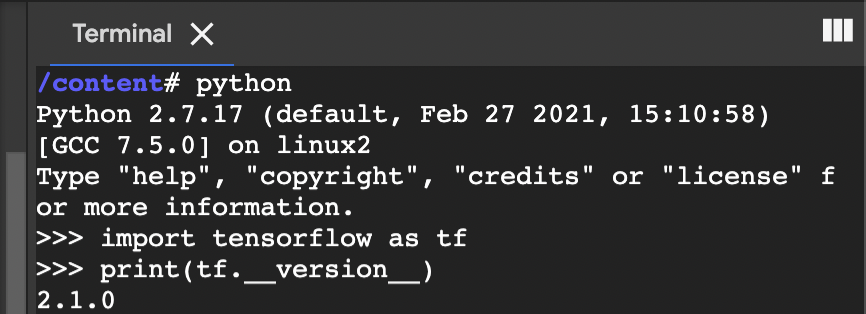

---
## **PROBLEM 2 : NNet supervised classification**


---
### **Section A**

For MNIST dataset, run a TF in supervised mode (train/test) and report results


---
### **Section B**

TF classification for 20NG


---
### **Section C**

Extra Credit. Run TF classification for MNIST using an Nvidia GPU



---
## **PROBLEM 3 : Autoencoders**
For each one of the datasets MNIST, 20NG, SPAMBASE, FASHION, run TF as an autoencoder with a desired hidden layer size (try K=5,10, 20, 100, 200- what is the smaleest K that works?). 

Verify the obtained re-encoding of data (the new feature representation) in several ways:

*   repeat a classification train/test task , or a clustering task
*   examine the new pairwise distances dist(i,j) agains the old distances obtained with original features (sample 100 pairs of related words)
*   examine the top 20 neighbours (by new distance) set overlap with old neighbours, per datapoint
*  for images, rebuild the image form output layer and draw to look at it



---
### **Section A : MNIST**
Run TF as an autoencoder with a desired hidden layer size (try K=5,10, 20, 100, 200- what is the smaleest K that works?).


---
### **Section B : FASHION**
Run TF as an autoencoder with a desired hidden layer size (try K=5,10, 20, 100, 200- what is the smaleest K that works?).


---
### **Section C : SPAMBASE**
Run TF as an autoencoder with a desired hidden layer size (try K=5,10, 20, 100, 200- what is the smaleest K that works?).


---
### **Section D : 20NG**
Run TF as an autoencoder with a desired hidden layer size (try K=5,10, 20, 100, 200- what is the smaleest K that works?).



---
## **PROBLEM 4 : Word Vectors**
On 20NG, run word-verctors embedding into 300 dimensions using a Tensor Flow setup. Evaluate in two ways:

*   given a word (from TA live during the demo), output the most similar 20 words based on embedding distance of your choice like cosine, euclidian, etc. Compare the 20 most similar words with the top 20 words by distance on Google word embeddings ( word2vec embeddings)
*   use a visulaizer that loads your embedding, projects it in 3 dimmensions and displays the words, for example TF projector




---
## **PROBLEM 5 EXTRA CREDIT: Image Feature Extraction**
Run a Convolutional Neural Network in Tensor Flow to extract image features. In practice the network usually does both the feature extraction and the supervised task (classification) in one pipeline.

---
## **PROBLEM 6 EXTRA CREDIT: LSTM for text**
Run a Recurrent Neural Network /LSTM in Tensor Flow to model word dependecies/order in text. Can be use for translation, next-word prediction, event detection etc.
LSTM article
